# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

In [108]:
#Following libraries will be used for the practical application
import pandas as pd
from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, TransformedTargetRegressor
from sklearn.inspection import permutation_importance
from sklearn.feature_selection import SequentialFeatureSelector
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold, LeaveOneOut
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# display the pipeline diagram in html format
from sklearn import set_config
set_config(display="diagram")

In [59]:
uncleansed_cars_df = pd.read_csv('data/vehicles.csv')
uncleansed_cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [60]:
uncleansed_cars_df

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy


In [61]:
#Considering region, year, manufaturer, model, condition,cylinders, fuel type, odometer, transmission, drive, size,type, paint_color
#may factor why the used cars price are less expensive and high expensive
uncleansed_cars_df['region'].unique()


array(['prescott', 'fayetteville', 'florida keys',
       'worcester / central MA', 'greensboro', 'hudson valley',
       'medford-ashland', 'erie', 'el paso', 'bellingham',
       'skagit / island / SJI', 'la crosse', 'auburn', 'birmingham',
       'dothan', 'florence / muscle shoals', 'gadsden-anniston',
       'huntsville / decatur', 'mobile', 'montgomery', 'tuscaloosa',
       'anchorage / mat-su', 'fairbanks', 'kenai peninsula',
       'southeast alaska', 'flagstaff / sedona', 'mohave county',
       'phoenix', 'show low', 'sierra vista', 'tucson', 'yuma',
       'fort smith', 'jonesboro', 'little rock', 'texarkana',
       'bakersfield', 'chico', 'fresno / madera', 'gold country',
       'hanford-corcoran', 'humboldt county', 'imperial county',
       'inland empire', 'los angeles', 'mendocino county', 'merced',
       'modesto', 'monterey bay', 'orange county', 'palm springs',
       'redding', 'reno / tahoe', 'sacramento', 'san diego',
       'san luis obispo', 'santa barbara',

In [62]:
#to determine if we need all the years, as the probability of buying used cars >1999 is more
uncleansed_cars_df['year'].unique()

array([  nan, 2014., 2010., 2020., 2017., 2013., 2012., 2016., 2019.,
       2011., 1992., 2018., 2004., 2015., 2001., 2006., 1968., 2003.,
       2008., 2007., 2005., 1966., 2009., 1998., 2002., 1999., 2021.,
       1997., 1976., 1969., 1995., 1978., 1954., 1979., 1970., 1974.,
       1996., 1987., 2000., 1955., 1960., 1991., 1972., 1988., 1994.,
       1929., 1984., 1986., 1989., 1973., 1946., 1933., 1958., 1937.,
       1985., 1957., 1953., 1942., 1963., 1977., 1993., 1903., 1990.,
       1965., 1982., 1948., 1983., 1936., 1932., 1951., 1931., 1980.,
       1967., 1971., 1947., 1981., 1926., 1962., 1975., 1964., 1934.,
       1952., 1940., 1959., 1950., 1930., 1956., 1922., 1928., 2022.,
       1901., 1941., 1924., 1927., 1939., 1923., 1949., 1961., 1935.,
       1918., 1900., 1938., 1913., 1916., 1943., 1925., 1921., 1915.,
       1945., 1902., 1905., 1920., 1944., 1910., 1909.])

In [63]:
uncleansed_cars_df['manufacturer'].unique()

array([nan, 'gmc', 'chevrolet', 'toyota', 'ford', 'jeep', 'nissan', 'ram',
       'mazda', 'cadillac', 'honda', 'dodge', 'lexus', 'jaguar', 'buick',
       'chrysler', 'volvo', 'audi', 'infiniti', 'lincoln', 'alfa-romeo',
       'subaru', 'acura', 'hyundai', 'mercedes-benz', 'bmw', 'mitsubishi',
       'volkswagen', 'porsche', 'kia', 'rover', 'ferrari', 'mini',
       'pontiac', 'fiat', 'tesla', 'saturn', 'mercury', 'harley-davidson',
       'datsun', 'aston-martin', 'land rover', 'morgan'], dtype=object)

In [64]:
uncleansed_cars_df['model'].unique()

array([nan, 'sierra 1500 crew cab slt', 'silverado 1500', ...,
       'gand wagoneer', '96 Suburban', 'Paige Glenbrook Touring'],
      dtype=object)

In [65]:
# To understand why we need salvage,  if the car is salvaged, we cannot drive legally
uncleansed_cars_df['condition'].unique()

array([nan, 'good', 'excellent', 'fair', 'like new', 'new', 'salvage'],
      dtype=object)

In [66]:
uncleansed_cars_df['cylinders'].unique()

array([nan, '8 cylinders', '6 cylinders', '4 cylinders', '5 cylinders',
       'other', '3 cylinders', '10 cylinders', '12 cylinders'],
      dtype=object)

In [67]:
uncleansed_cars_df['fuel'].unique()

array([nan, 'gas', 'other', 'diesel', 'hybrid', 'electric'], dtype=object)

In [68]:
# To determine if we need other transmission type
uncleansed_cars_df['transmission'].unique()

array([nan, 'other', 'automatic', 'manual'], dtype=object)

In [69]:
uncleansed_cars_df['drive'].unique()

array([nan, 'rwd', '4wd', 'fwd'], dtype=object)

In [70]:
uncleansed_cars_df['size'].unique()

array([nan, 'full-size', 'mid-size', 'compact', 'sub-compact'],
      dtype=object)

In [71]:
uncleansed_cars_df['type'].unique()

array([nan, 'pickup', 'truck', 'other', 'coupe', 'SUV', 'hatchback',
       'mini-van', 'sedan', 'offroad', 'bus', 'van', 'convertible',
       'wagon'], dtype=object)

In [72]:
uncleansed_cars_df['paint_color'].unique()

array([nan, 'white', 'blue', 'red', 'black', 'silver', 'grey', 'brown',
       'yellow', 'orange', 'green', 'custom', 'purple'], dtype=object)

In [73]:
uncleansed_cars_df

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,wyoming,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,1N4AA6AV6KC367801,fwd,NaN,sedan,NaN,wy
426876,7301591187,wyoming,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,7JR102FKXLG042696,fwd,NaN,sedan,red,wy
426877,7301591147,wyoming,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,1GYFZFR46LF088296,NaN,NaN,hatchback,white,wy
426878,7301591140,wyoming,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,58ABK1GG4JU103853,fwd,NaN,sedan,silver,wy


manufacturer
acura               49
alfa-romeo           5
aston-martin         2
audi               117
bmw                251
buick               83
cadillac            92
chevrolet          519
chrysler            86
datsun               3
dodge              173
ferrari              5
fiat                17
ford               796
gmc                207
harley-davidson      1
honda              231
hyundai            102
infiniti            81
jaguar              35
jeep               148
kia                 98
land rover           1
lexus              119
lincoln             50
mazda              102
mercedes-benz      265
mercury             28
mini                27
mitsubishi          43
nissan             245
pontiac             57
porsche             39
ram                171
rover               37
saturn              28
subaru             155
tesla               10
toyota             340
volkswagen         143
volvo               70
Name: model, dtype: int64


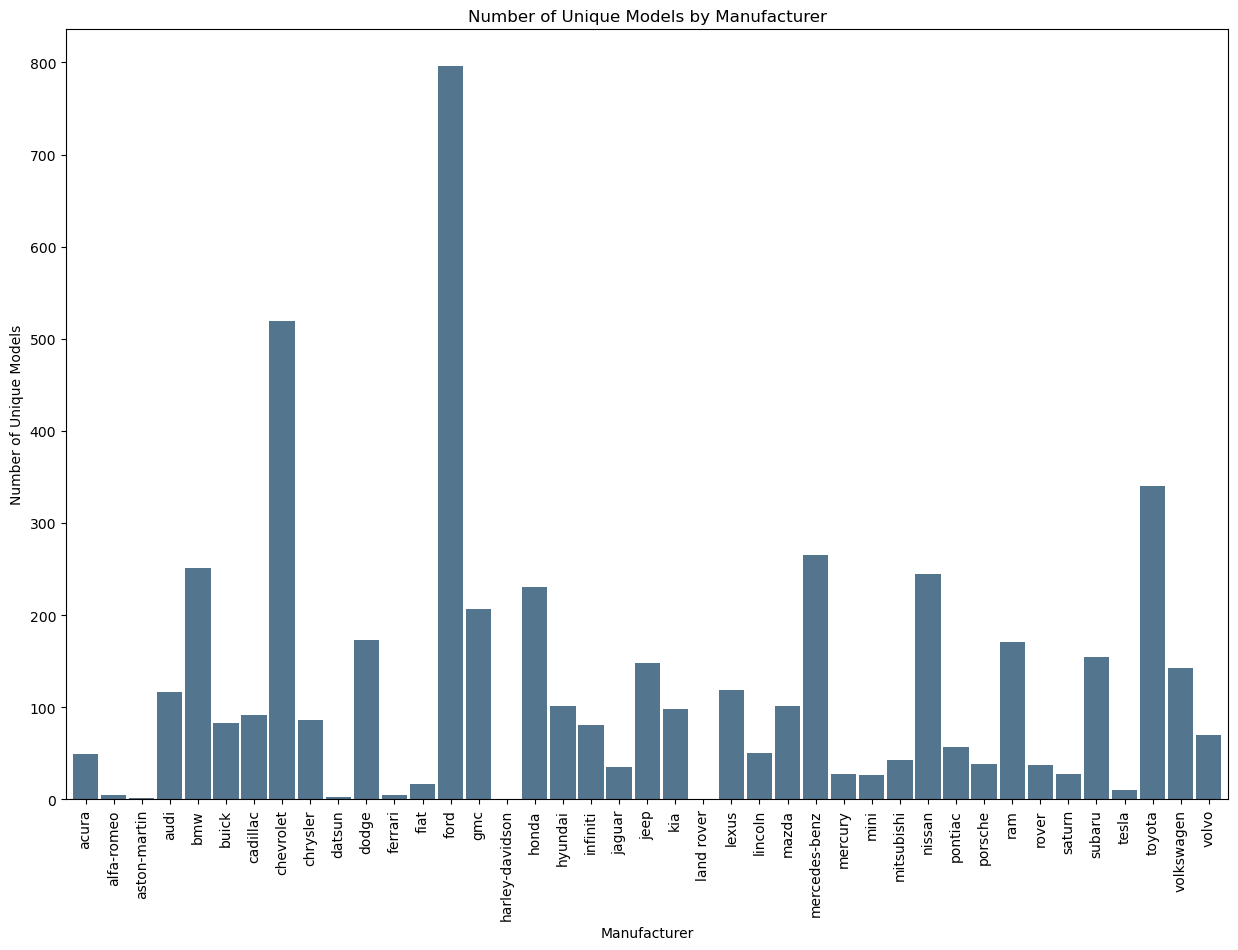

In [74]:
#table of the unique values of the 'model', grouped by 'manufacturer
uncleansed_cars_df = uncleansed_cars_df.drop_duplicates(subset='VIN', keep='first')
uncleansed_cars_df = uncleansed_cars_df.dropna()
#drop columns with missing values
uncleansed_cars_df = uncleansed_cars_df.dropna(axis=1)
make_table = uncleansed_cars_df.groupby('manufacturer')['model'].nunique()
print(make_table)

#bar chart of the make_table
make_table.plot(kind='bar', width=.9, color='#54758e', figsize=(15, 10))
plt.title('Number of Unique Models by Manufacturer')
plt.xlabel('Manufacturer')
plt.ylabel('Number of Unique Models')
plt.show()

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [75]:
#After evaluating the unique values in the features [region, year,manufacturer,model,condition,cylinders,fuel,odometer,
#transmission,drive,size,type,paint_color] we need cleanse the data and perform modeling on the cleansed data


In [89]:
#Remove NaN rows
cleansed_cars_df = uncleansed_cars_df[['title_status','region','price','year','manufacturer','model','condition','cylinders','fuel','transmission','drive','size','type','paint_color','odometer']]

cleansed_cars_df=cleansed_cars_df.dropna()

#Convert the year to int, as it is represented in decimal
cleansed_cars_df['year']= cleansed_cars_df['year'].astype(int)


# Tranformation

# Convert values to integers
cleansed_cars_df['cylinders'] = cleansed_cars_df['cylinders'].str.extract('(\d+)').astype(float).astype('Int64')
cleansed_cars_df['odometer'] = cleansed_cars_df['odometer'].astype('int64')

# Dropping the rows where the cylinders, fuel,transmission, type have other as a value
cleansed_cars_df = cleansed_cars_df[cleansed_cars_df['cylinders'] != 'other']
cleansed_cars_df = cleansed_cars_df[cleansed_cars_df['fuel'] != 'other']
cleansed_cars_df = cleansed_cars_df[cleansed_cars_df['transmission'] != 'other']
cleansed_cars_df = cleansed_cars_df[cleansed_cars_df['type'] != 'other']
cleansed_cars_df = cleansed_cars_df[cleansed_cars_df['condition'] != 'salvage']
cleansed_cars_df = cleansed_cars_df[cleansed_cars_df['manufacturer'] != 'other']
cleansed_cars_df = cleansed_cars_df[cleansed_cars_df['model'] != 'other']

#Removing rows where price is <=175000 and price >=500
cleansed_cars_df = cleansed_cars_df.query('price >= 500 & price <= 175500')

#Removing the used car model where year <1994
cleansed_cars_df=cleansed_cars_df.query('year >= 1995')

#Define mapping for condition, transmission, fuel

condition_map = {
    'new': 5,
    'like new': 4,
    'excellent': 3,
    'good': 2,
    'fair': 1
}

cleansed_cars_df['condition'] = cleansed_cars_df['condition'].map(condition_map).astype(int)


transmission_map = {
    'automatic': 1,
    'manual': 0
}

# Map condition categories to numerical values, convert the column to integer type
cleansed_cars_df['transmission'] = cleansed_cars_df['transmission'].map(transmission_map).astype(int)


# remove duplicates
cleansed_cars_df = cleansed_cars_df.drop_duplicates()




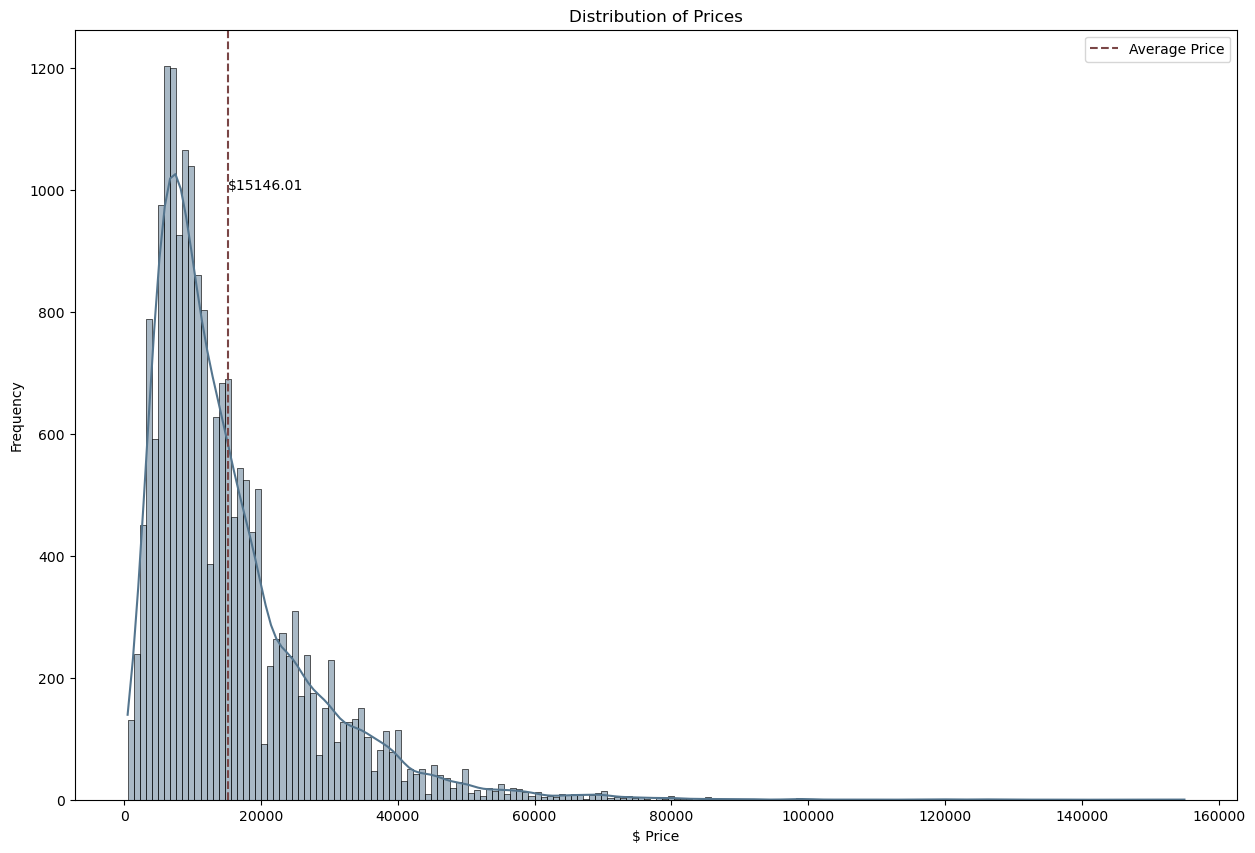

In [91]:
# As the objective is to determine the factors for price being expensive or low for used cars
# Derive the top 50 expensive cars


plt.figure(figsize=(15, 10))
sns.histplot(cleansed_cars_df['price'], kde=True, color='#54758e')
plt.title('Distribution of Prices')
plt.xlabel('$ Price')
plt.ylabel('Frequency')
#create a label for the average price
average_price = cleansed_cars_df['price'].mean()
plt.axvline(average_price, color='#7a4646', linestyle='--', label='Average Price')
# include the value of the average price, and add a legend
plt.text(average_price, 1000, f'${round(average_price, 2)}', rotation=0, color='black')
plt.legend()
plt.show()

In [97]:
#Derive top 50 most expensive cars
top_50_max_prices = cleansed_cars_df.nlargest(50, 'price')[['manufacturer', 'model', 'year', 'condition','price']]
print(top_50_max_prices)

         manufacturer                     model  year  condition   price
323687  mercedes-benz             benz sprinter  2020          5  155000
368720          volvo                       s60  2013          2  144832
234446        porsche                       928  1995          3  129928
374724       cadillac                  escalade  2021          3  126995
420693        porsche               911 turbo s  2014          3  125000
170109          rover                     sport  2020          3  124900
42481         ferrari                      f430  2005          3  120000
419656      chevrolet                  corvette  2021          2  119900
44736           rover              supercharged  2021          5  118300
278384            bmw                      850i  2019          4  115000
113451      chevrolet              corvette lt3  2020          4  109000
4826              bmw                     m805i  2020          3  104900
127952         nissan                  gt-r r35  20

In [99]:
#removed row with index 91502,111853 as it was a ford escape,volvo,dodge with a price of 150,000,120k,112k as it is not a valid pricing point
cleansed_cars_df = cleansed_cars_df.drop([91502,111853,368720])
#reviewing the top 50 most expensive cars to ensure rows are removed    
top_50_max_prices = cleansed_cars_df.nlargest(50, 'price')[['manufacturer', 'model', 'year', 'price']]
print(top_50_max_prices)

         manufacturer                         model  year   price
323687  mercedes-benz                 benz sprinter  2020  155000
234446        porsche                           928  1995  129928
374724       cadillac                      escalade  2021  126995
420693        porsche                   911 turbo s  2014  125000
170109          rover                         sport  2020  124900
42481         ferrari                          f430  2005  120000
419656      chevrolet                      corvette  2021  119900
44736           rover                  supercharged  2021  118300
278384            bmw                          850i  2019  115000
113451      chevrolet                  corvette lt3  2020  109000
4826              bmw                         m805i  2020  104900
127952         nissan                      gt-r r35  2018   99990
35419            ford          super duty f-250 srw  2018   99700
5064          porsche                panamera turbo  2017   98995
346       

In [101]:
#Consider the top 50 least expensive cars
top_50_min_prices = cleansed_cars_df.nsmallest(50, 'price')[['manufacturer', 'model', 'year', 'condition', 'price']]
print(top_50_min_prices)

       manufacturer                   model  year  condition  price
119447     cadillac                  srx v6  2005          1    500
140059         ford                  escape  2014          3    500
178473         ford                freestar  2005          1    500
238544    chevrolet             trailblazer  2002          1    500
291213         ford                  taurus  2004          3    500
291232    chevrolet                cavalier  2004          3    500
291239    chevrolet                  cobalt  2010          3    500
291253      hyundai                 elantra  2005          3    500
321875    chevrolet  impala ltz luxury seda  2009          2    500
321886         ford          escape xlt awd  2006          3    500
321906          kia               sedona ex  2008          3    500
321907         ford                focus se  2011          3    500
321908     infiniti                     g35  2004          3    500
215245       subaru                 impreza  199

In [102]:
#create a new dataframe to store the cleaned data
cleansed_copy_df = cleansed_cars_df.copy()
#replace the categorical variables with the numerical values using LabelEncoder instead of OneHotEncoder from Savios recording
cleansed_copy_df['region'] = LabelEncoder().fit_transform(cleansed_copy_df['region'])
cleansed_copy_df['manufacturer'] = LabelEncoder().fit_transform(cleansed_copy_df['manufacturer'])
cleansed_copy_df['model'] = LabelEncoder().fit_transform(cleansed_copy_df['model'])
cleansed_copy_df['condition'] = LabelEncoder().fit_transform(cleansed_copy_df['condition'])
cleansed_copy_df['cylinders'] = LabelEncoder().fit_transform(cleansed_copy_df['cylinders'])
cleansed_copy_df['fuel'] = LabelEncoder().fit_transform(cleansed_copy_df['fuel'])
cleansed_copy_df['title_status'] = LabelEncoder().fit_transform(cleansed_copy_df['title_status'])
cleansed_copy_df['transmission'] = LabelEncoder().fit_transform(cleansed_copy_df['transmission'])
cleansed_copy_df['drive'] = LabelEncoder().fit_transform(cleansed_copy_df['drive'])
cleansed_copy_df['size'] = LabelEncoder().fit_transform(cleansed_copy_df['size'])
cleansed_copy_df['type'] = LabelEncoder().fit_transform(cleansed_copy_df['type'])
cleansed_copy_df['paint_color'] = LabelEncoder().fit_transform(cleansed_copy_df['type'])
cleansed_copy_df['state'] = LabelEncoder().fit_transform(cleansed_copy_df['type'])



print(cleansed_copy_df.info())
cleansed_copy_df.head(5)

<class 'pandas.core.frame.DataFrame'>
Index: 19478 entries, 215 to 426833
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   title_status  19478 non-null  int64
 1   region        19478 non-null  int64
 2   price         19478 non-null  int64
 3   year          19478 non-null  int64
 4   manufacturer  19478 non-null  int64
 5   model         19478 non-null  int64
 6   condition     19478 non-null  int64
 7   cylinders     19478 non-null  int64
 8   fuel          19478 non-null  int64
 9   transmission  19478 non-null  int64
 10  drive         19478 non-null  int64
 11  size          19478 non-null  int64
 12  type          19478 non-null  int64
 13  paint_color   19478 non-null  int64
 14  odometer      19478 non-null  int64
 15  state         19478 non-null  int64
dtypes: int64(16)
memory usage: 2.5 MB
None


,title_status,region,price,year,manufacturer,model,condition,cylinders,fuel,transmission,drive,size,type,paint_color,odometer,state
215,0,28,4000,2002,37,1386,2,1,2,1,1,0,8,8,155000,8
219,0,28,2500,1995,4,331,0,3,2,1,2,2,8,8,110661,8
268,0,28,9000,2008,24,2764,2,1,2,1,2,0,2,2,56700,2
337,0,28,8950,2011,12,1704,2,3,2,1,1,1,9,9,164000,9
346,0,28,98900,2001,10,266,1,4,2,1,2,2,2,2,20187,2


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

   title_status    region     price      year  manufacturer     model  \
0     -0.205897 -1.366875 -0.931977 -1.781074      1.670000 -0.692642   
1     -0.205897 -1.366875 -1.057622 -3.148460     -1.305509 -1.521383   
2     -0.205897 -1.366875 -0.513159 -0.609029      0.497830  0.389827   
3     -0.205897 -1.366875 -0.517347 -0.023006     -0.584173 -0.442841   
4     -0.205897 -1.366875  7.017189 -1.976415     -0.764507 -1.572442   

   condition  cylinders      fuel  transmission     drive      size      type  \
0   0.298475  -1.206172  0.196719      0.232511  0.369421 -1.798196  0.717529   
1  -2.610554   0.398926  0.196719      0.232511  1.720705  1.135857  0.717529   
2   0.298475  -1.206172  0.196719      0.232511  1.720705 -1.798196 -0.835651   
3   0.298475   0.398926  0.196719      0.232511  0.369421 -0.331169  0.976392   
4  -1.156039   1.201475  0.196719      0.232511  1.720705  1.135857 -0.835651   

   paint_color  odometer     state  
0     0.717529  0.628540  0.717529  


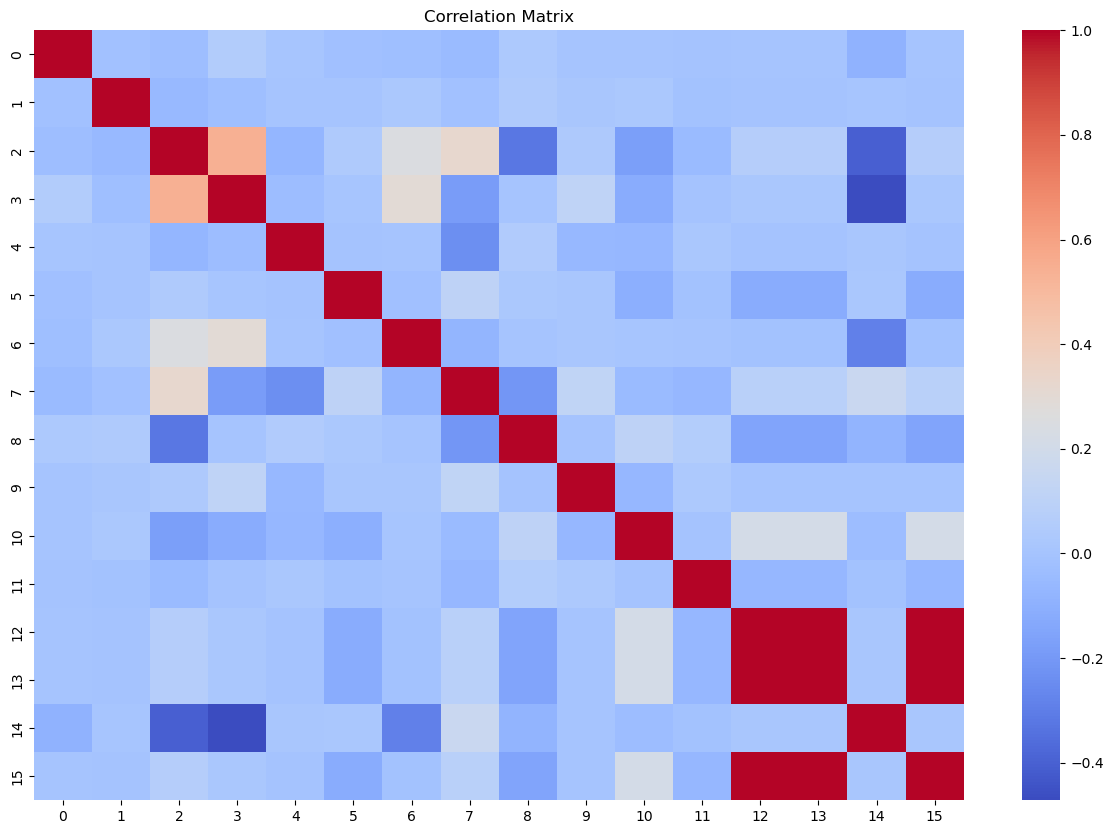

[('price', 'year', 0.5439151490059937), ('price', 'cylinders', 0.32270021254735715), ('price', 'fuel', -0.326967306681215), ('price', 'odometer', -0.40561079441139847), ('year', 'price', 0.5439151490059937), ('year', 'odometer', -0.47189927509622825), ('cylinders', 'price', 0.3227002125473571), ('fuel', 'price', -0.326967306681215), ('odometer', 'price', -0.40561079441139847), ('odometer', 'year', -0.47189927509622825)]


In [201]:
#scaling the cleansed_copy_df dataframe
scaler = StandardScaler()
cleansed_cars_scaled = scaler.fit_transform(cleansed_copy_df)
#add the original column names to the scaled data
cleansed_cars_scaled = pd.DataFrame(cleansed_cars_scaled, columns=cleansed_copy_df.columns)
print(cleansed_cars_scaled.head())

#correlation matrix of the cleansed_cars_scaled dataframe
correlation_matrix = np.corrcoef(cleansed_cars_scaled.T)
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
#list of column names for the correlation matrix
columns = cleansed_copy_df.columns
#use the correlation matrix to identify the features with a correlation greater than 0.3 and less than 1
high_correlation = []
for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix[i])):
        if i != j and abs(correlation_matrix[i][j]) > 0.3 and abs(correlation_matrix[i][j]) < 1:
            high_correlation.append((columns[i], columns[j], correlation_matrix[i][j]))
print(high_correlation)

In [202]:
#Determine the important features
cleansed_cars_scaled = pd.DataFrame(cleansed_cars_scaled, columns=cleansed_copy_df.columns)
#split the data into the target and features, target is Price
X = cleansed_cars_scaled.drop(columns=['price'])
y = cleansed_cars_scaled['price']

#linear regression to identify the most important features
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, y)
#identify the most important features
feature_importance = linreg.coef_
feature_importance = pd.Series(feature_importance, index=X.columns)
feature_importance = feature_importance.abs()
feature_importance = feature_importance.sort_values(ascending=False)
print(feature_importance)

year            0.487512
cylinders       0.420866
odometer        0.253337
fuel            0.253045
drive           0.083720
transmission    0.067569
condition       0.065487
title_status    0.054798
manufacturer    0.053987
region          0.022711
size            0.008390
model           0.001085
paint_color     0.000983
type            0.000983
state           0.000983
dtype: float64


In [123]:
#linear regression model to predict price of the car based on the most important features as mentioned above
#split the data into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# fit the linear regression model to the training data
pipe_line = Pipeline([('linreg', LinearRegression())])
pipe_line.fit(X_train, y_train)
# predict the price of the car based on the test data
y_pred = linreg.predict(X_test)

# evaluate the model
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.4178484447632865
Mean Squared Error: 0.4059232202521624
Root Mean Squared Error: 0.6371210405034214


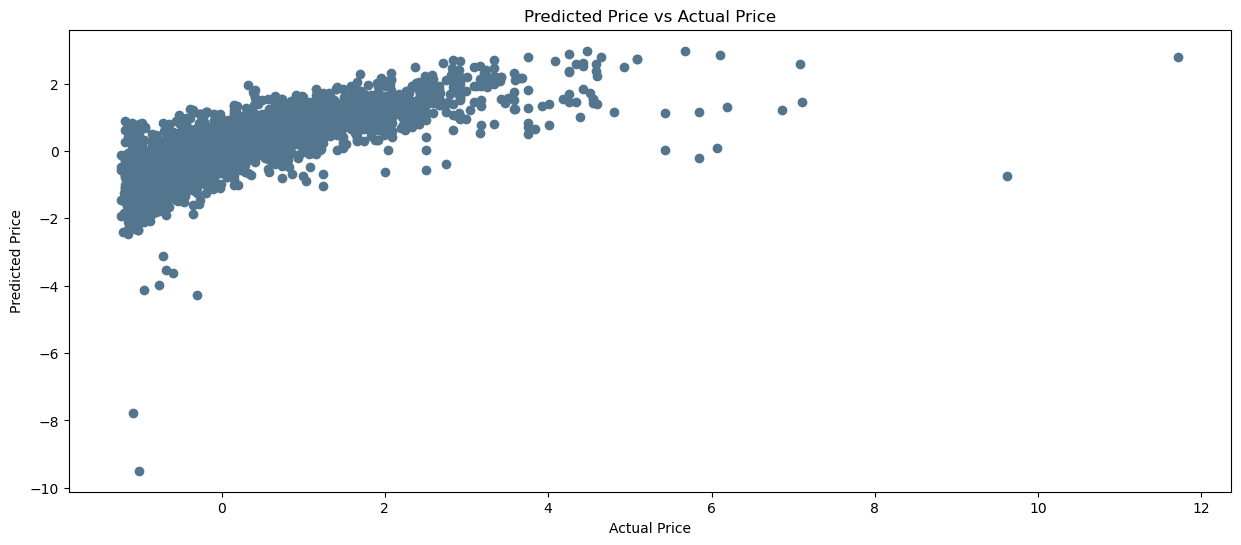

In [204]:
#plot of the predicted price vs the actual price
plt.figure(figsize=(15, 6))
plt.scatter(y_test, y_pred, color='#54758e')
plt.title('Predicted Price vs Actual Price')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

In [112]:
# Pipe with a 4-columns selector and a linear regression on all features
pipe_4_features = Pipeline([
    ('column_selector', SequentialFeatureSelector(LinearRegression(), n_features_to_select=4)),
    ('linreg', LinearRegression())
    ])
pipe_4_features.fit(X_train, y_train)
#print best feautres
print(pipe_4_features.named_steps['column_selector'].get_support())
print(X.columns[pipe_4_features.named_steps['column_selector'].get_support()])
#predict the price of the car based on the test data
y_pred_4 = pipe_4_features.predict(X_test)
#evaluate the model
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_4))
print('Mean Squared Error:',mean_squared_error(y_test, y_pred_4))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred_4)))

[False False  True False False False  True  True False False False False
 False  True False]
Index(['year', 'cylinders', 'fuel', 'odometer'], dtype='object')
Mean Absolute Error: 0.42734314457091754
Mean Squared Error: 0.43053133383441367
Root Mean Squared Error: 0.6561488656047602


Mean Absolute Error: 0.4178341544214849
Mean Squared Error: 0.41187520985447434
Root Mean Squared Error: 0.6417750461450448
[-0.06114071 -0.02048306  0.48197574  0.05509904 -0.00102926  0.05847954
  0.42993885 -0.25313224 -0.07077591 -0.08734886 -0.00644689  0.00150794
  0.00150794 -0.28944789  0.00150794]
Index(['title_status', 'region', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'transmission', 'drive', 'size', 'type',
       'paint_color', 'odometer', 'state'],
      dtype='object')


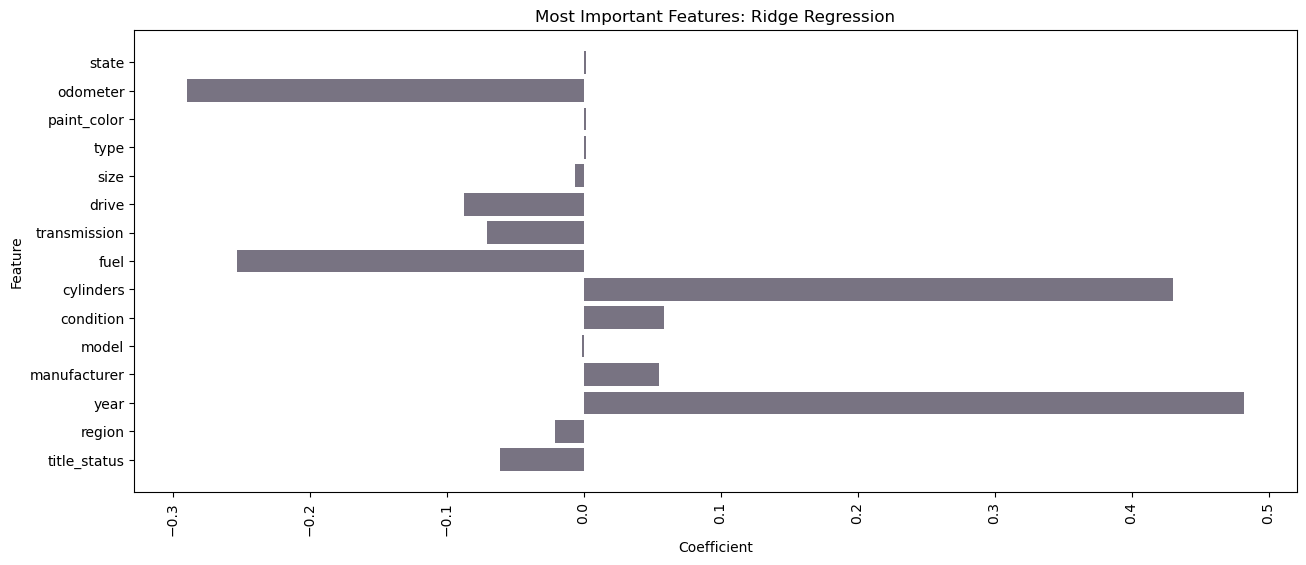

In [205]:
#ridge regression model to predict price of the car based on the most important features
pipe_ridge = Pipeline([('ridge', Ridge())])
pipe_ridge.fit(X_train, y_train)
# predict the price of the car based on the test data
y_pred = pipe_ridge.predict(X_test)
# evaluate the model
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))

#show the features selected with the ridge regression model by calculating the coefficients
print(pipe_ridge.named_steps['ridge'].coef_)
print(X.columns[pipe_ridge.named_steps['ridge'].coef_ != 0])

#bar chart of the most important features
plt.figure(figsize=(15, 6))
plt.barh(X.columns, pipe_ridge.named_steps['ridge'].coef_, color='#787382')
plt.title('Most Important Features: Ridge Regression')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.xticks(rotation=90)
plt.show()

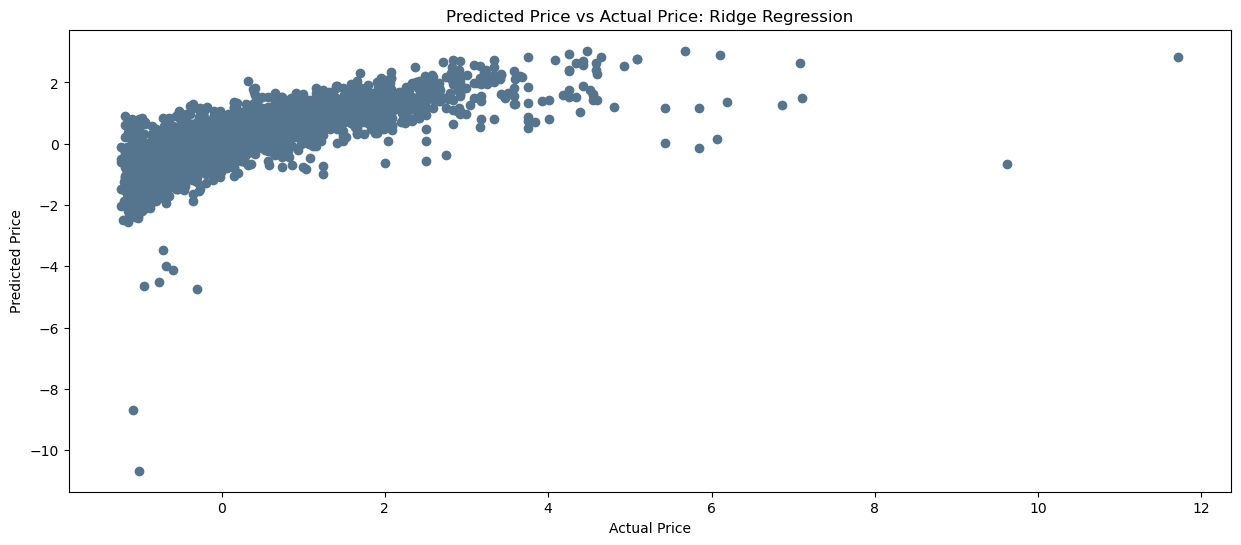

In [206]:
#plot of the predicted price vs the actual price for the ridge regression model
plt.figure(figsize=(15, 6))
plt.scatter(y_test, y_pred, color='#54758d')
plt.title('Predicted Price vs Actual Price: Ridge Regression')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

In [116]:

#grouping the cars by fuel type and calculate the average price
fuel_avg_price = cleansed_cars_df.groupby('fuel')['price'].mean()
fuel_avg_price = fuel_avg_price.round(2)
#create a new dataframe to store the results
fuel_avg_price_df = pd.DataFrame(fuel_avg_price)
fuel_avg_price_df

,price
fuel,
diesel,31930.00
electric,18952.31
gas,14233.09
hybrid,11560.24


In [117]:
#create a list of cylinder types by average price
cylinder_avg_price = cleansed_cars_df.groupby('cylinders')['price'].mean()
cylinder_avg_price = cylinder_avg_price.round(2)
#create a new dataframe to store the results
cylinder_avg_price_df = pd.DataFrame(cylinder_avg_price)
cylinder_avg_price_df

,price
cylinders,
3,12542.85
4,11020.62
5,8423.05
6,15087.49
8,21406.05
10,18753.93
12,20597.80


In [118]:
#Deriving average car price by manufacturer 
manufacturer_avg_price = cleansed_cars_df.groupby('manufacturer')['price'].mean()
manufacturer_avg_price = manufacturer_avg_price.round(2)

#create a new dataframe to store the results
manufacturer_avg_price_df = pd.DataFrame(manufacturer_avg_price)
#Calculate the number of cars by manufacturer
manufacturer_avg_price_df['number_of_cars'] = cleansed_cars_df['manufacturer'].value_counts()
manufacturer_avg_price_df['average_year'] =cleansed_cars_df.groupby('manufacturer')['year'].mean().round(0)
manufacturer_avg_price_df

,price,number_of_cars,average_year
manufacturer,,,
acura,11889.35,171,2010.0
alfa-romeo,35425.00,4,2018.0
aston-martin,50925.00,2,2004.0
audi,16999.38,273,2012.0
bmw,16127.58,561,2011.0
buick,10981.41,243,2011.0
cadillac,16286.53,255,2011.0
chevrolet,16689.09,2597,2011.0
chrysler,9136.25,357,2011.0


In [203]:
#create a Lasso regression model to predict price of the car based on the most important features
# Pipe on a scaler + Lasso with grid search + 5-Fold cross validation
pipe_lasso_param_dict = {'lasso__alpha': [0.001, 0.01, 0.1, 1, 10]}
pipe_lasso = Pipeline([
    ('scaler', StandardScaler()),
    ('lasso', Lasso())
])
pipe_lasso_grid = GridSearchCV(pipe_lasso, param_grid=pipe_lasso_param_dict, cv=5)
pipe_lasso_grid.fit(X_train, y_train)

#print the most important features of the Lasso regression model
print(pipe_lasso_grid.best_estimator_.named_steps['lasso'].coef_)
print(X.columns[pipe_lasso_grid.best_estimator_.named_steps['lasso'].coef_ != 0])

#evaluate the lasso regression model
y_pred_lasso = pipe_lasso_grid.predict(X_test)
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_lasso))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_lasso))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred_lasso)))


[-0.06052973 -0.01950226  0.47909943  0.05391046 -0.          0.05779415
  0.42851522 -0.2487724  -0.07025642 -0.08609771 -0.00564738  0.
  0.         -0.27430889  0.00364135]
Index(['title_status', 'region', 'year', 'manufacturer', 'condition',
       'cylinders', 'fuel', 'transmission', 'drive', 'size', 'odometer',
       'state'],
      dtype='object')
Mean Absolute Error: 0.41755659145140084
Mean Squared Error: 0.4115855302355367
Root Mean Squared Error: 0.6415493201894432


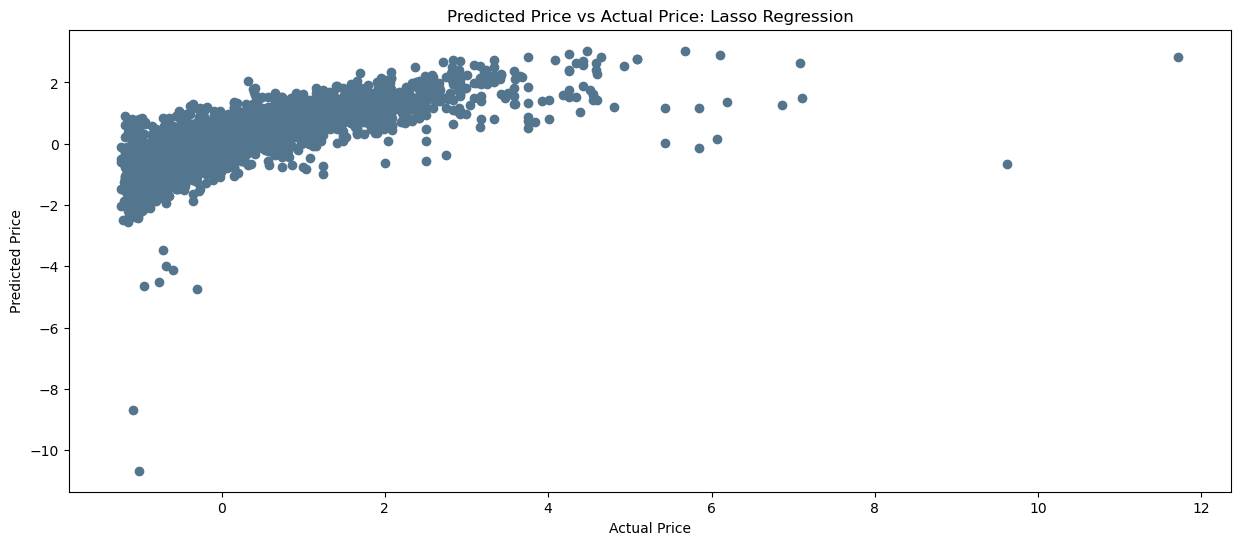

In [207]:
#creating a plot of the predicted price vs the actual price for the Lasso regression model
plt.figure(figsize=(15, 6))
plt.scatter(y_test, y_pred, color='#54758e')
plt.title('Predicted Price vs Actual Price: Lasso Regression')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.show()

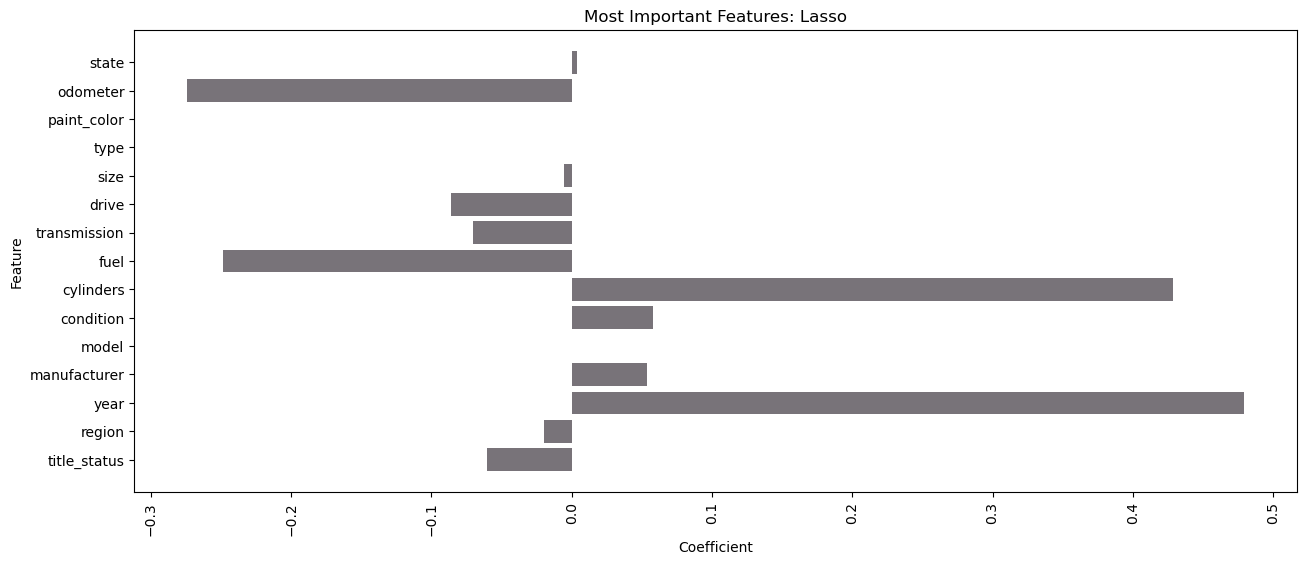

In [209]:
plt.figure(figsize=(15, 6))
plt.barh(X.columns, pipe_lasso_grid.best_estimator_.named_steps['lasso'].coef_, color='#787379')
plt.title('Most Important Features: Lasso')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.xticks(rotation=90)
plt.show()

### Evaluation

After applying LinearRegression, Ridge and Lasso Regression models, all models showed consistantly the common important features

1.year
2.cylinders
3.odometer
4.fuel


In [127]:
#determining the most important features by model
most_important_features = pd.DataFrame({'Linear Regression': ['year','cylinders','fuel','odometer'],
                                       'Ridge Regression': ['odometer', 'fuel', 'cylinders', 'year'],
                                       'Lasso Regression': ['odometer', 'fuel', 'cylinders', 'year']})
most_important_features

,Linear Regression,Ridge Regression,Lasso Regression
0,year,odometer,odometer
1,cylinders,fuel,fuel
2,fuel,cylinders,cylinders
3,odometer,year,year


In [129]:
#create a dataframe to store the mean absolute error, mean squared error, root mean squared error
model_evaluation = pd.DataFrame({'Linear Regression': [mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred))],
                                'Ridge Regression': [mean_absolute_error(y_test, y_pred), mean_squared_error(y_test, y_pred), np.sqrt(mean_squared_error(y_test, y_pred))],
                                'Lasso Regression': [mean_absolute_error(y_test, y_pred_lasso), mean_squared_error(y_test, y_pred_lasso), np.sqrt(mean_squared_error(y_test, y_pred_lasso))]},
                               index=['Mean Absolute Error', 'Mean Squared Error', 'Root Mean Squared Error'])
model_evaluation

,Linear Regression,Ridge Regression,Lasso Regression
Mean Absolute Error,0.417848,0.417848,0.417557
Mean Squared Error,0.405923,0.405923,0.411586
Root Mean Squared Error,0.637121,0.637121,0.641549


In [130]:
#determine the best model
best_model = model_evaluation.idxmax(axis=1)
best_model = pd.DataFrame(best_model, columns=['Best Model'])
print(best_model)

                                Best Model
Mean Absolute Error      Linear Regression
Mean Squared Error        Lasso Regression
Root Mean Squared Error   Lasso Regression


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

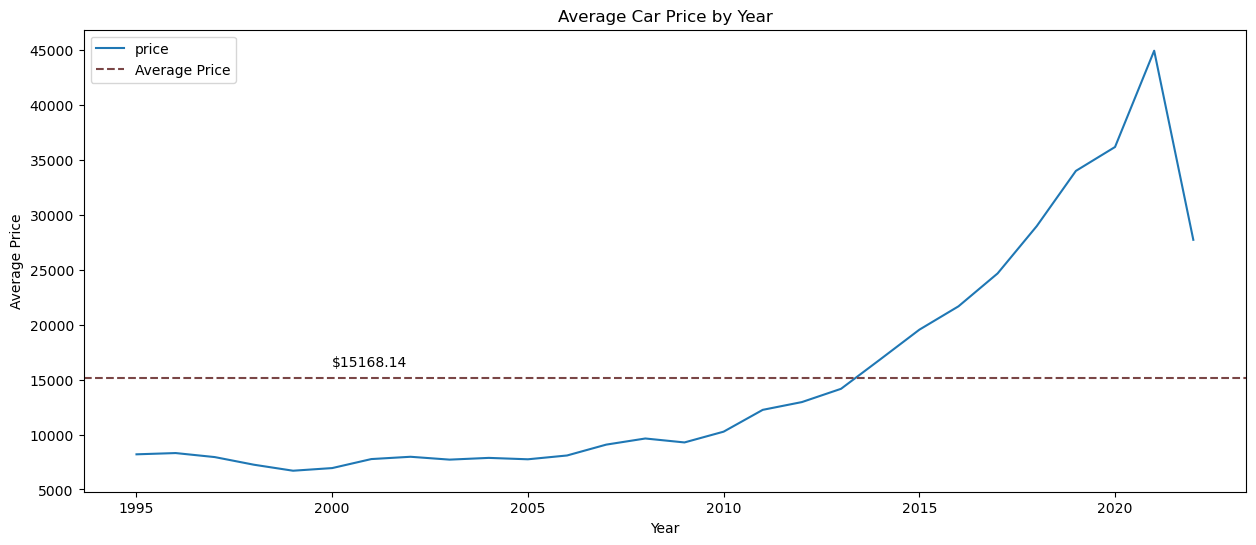

In [210]:
#As we have identified that the factors for determining the used car price could be based on Year, Fuel Type, Cylinders, Odometer reading
# Below is to split the each individual feature and provide the average pricing

##### Average Price of Car by Year

cleansed_cars_avg_by_year = cleansed_cars_df.groupby('year')['price'].mean()

cleansed_cars_avg_plot = pd.DataFrame(cleansed_cars_avg_by_year)

#creating a lineplot for the average car price by year
plt.figure(figsize=(15, 6))
sns.lineplot(data=cleansed_cars_avg_plot, color='#54758d')
#show an average price line for all years
avg_price = cleansed_cars_avg_by_year.mean()
plt.axhline(avg_price, color='#7a4646', linestyle='--', label='Average Price')
# include the value of the average price, and add a legend
plt.text(2000, avg_price + 1000, f'${round(avg_price, 2)}', rotation=0, color='black')
plt.legend()
plt.title('Average Car Price by Year')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.show()

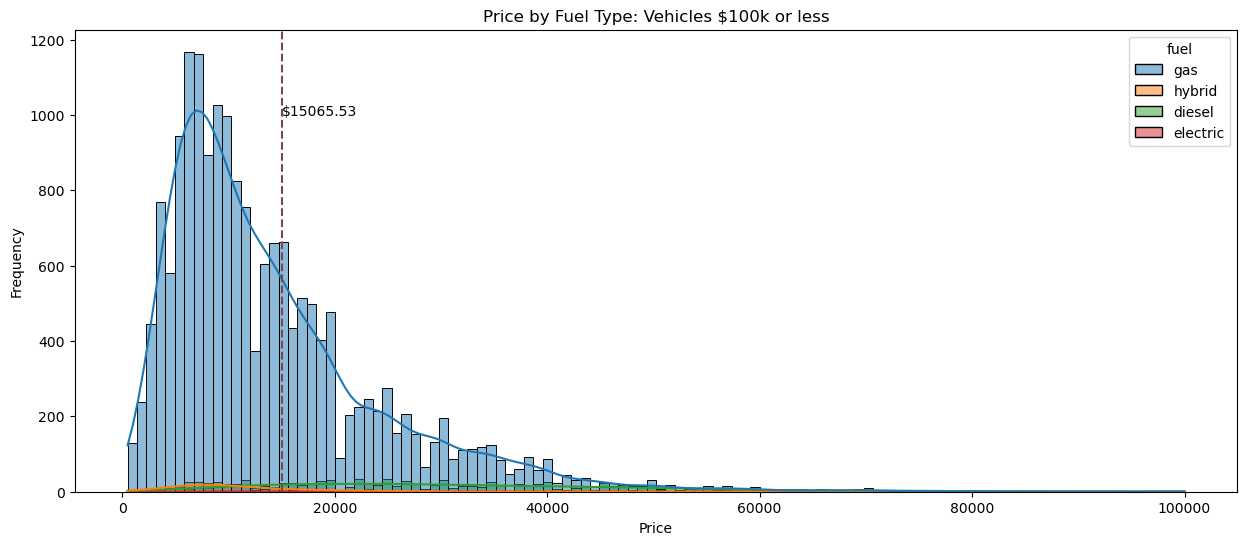

In [211]:
#Providing the average price based on the fuel type, limiting to 100000 as the most of the make and models are below 100000
cleansed_cars_df = cleansed_cars_df[cleansed_cars_df['price'] < 100000]
plt.figure(figsize=(15, 6))
sns.histplot(data=cleansed_cars_df, x='price', hue='fuel', kde=True, palette='tab10')
plt.title('Price by Fuel Type: Vehicles $100k or less')
avg_price = cleansed_cars_df['price'].mean()
plt.axvline(avg_price, color='#7a4646', linestyle='--', label='Average Price')
plt.text(avg_price, 1000, f'${round(avg_price, 2)}', rotation=0, color='black')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


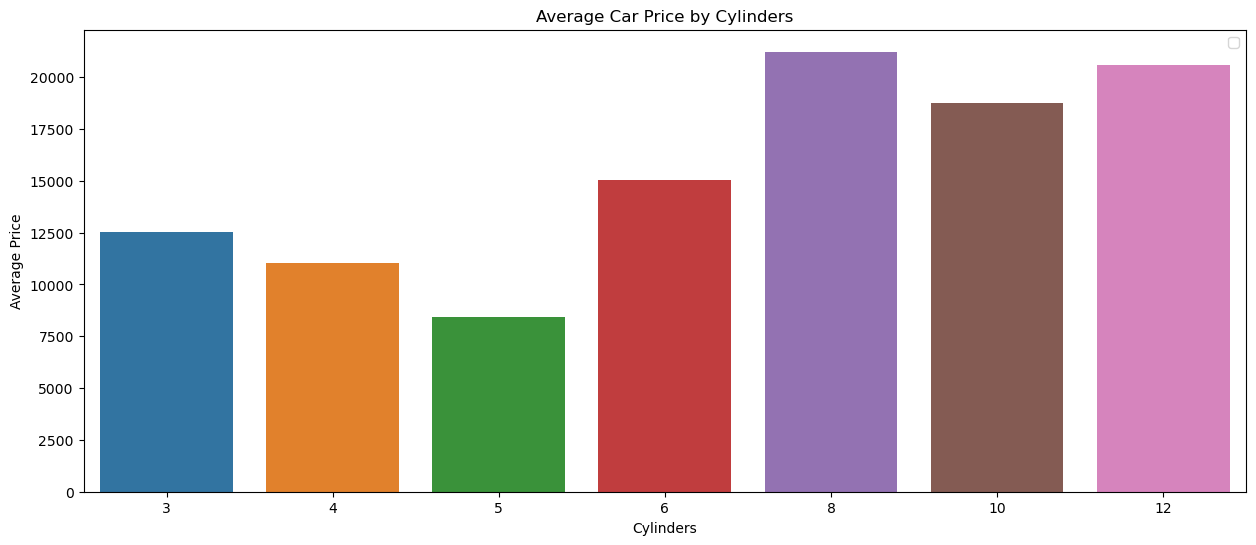

In [194]:
#Calculate and display the average price based on the cylinders
#plt.figure(figsize=(15, 10))
#sns.barplot(data=cleansed_cars_df, x='cylinders', y='price', palette='tab10')

#plt.title('Average Price by Cylinders')
#plt.xlabel('Cylinders')
#plt.ylabel('Average Price')
#plt.show()
#Providing the average price based on the cylinders, limiting to 175000 as the most of the make and models are below 100000
cleansed_cars_avg_by_cylinders = cleansed_cars_df.groupby('cylinders')['price'].mean().rename("Price").reset_index()



cleansed_cars_avg_plot_cylinders = pd.DataFrame(cleansed_cars_avg_by_cylinders)

cleansed_cars_avg_plot_cylinders.head()


#creating a barplot for the average car price by year
plt.figure(figsize=(15, 6))
sns.barplot(data=cleansed_cars_avg_plot_cylinders, x='cylinders', y='Price', palette='tab10')
#show an average price line for all cylinders
#avg_price = cleansed_cars_avg_by_cylinders.mean()
#print(avg_price)
#plt.axhline(avg_price, color='#7a4646', linestyle='--', label='Average Price')
# include the value of the average price, and add a legend
#plt.text(2000, avg_price + 1000, f'${round(avg_price, 2)}', rotation=0, color='black')
plt.legend()
plt.title('Average Car Price by Cylinders')
plt.xlabel('Cylinders')
plt.ylabel('Average Price')
plt.show()


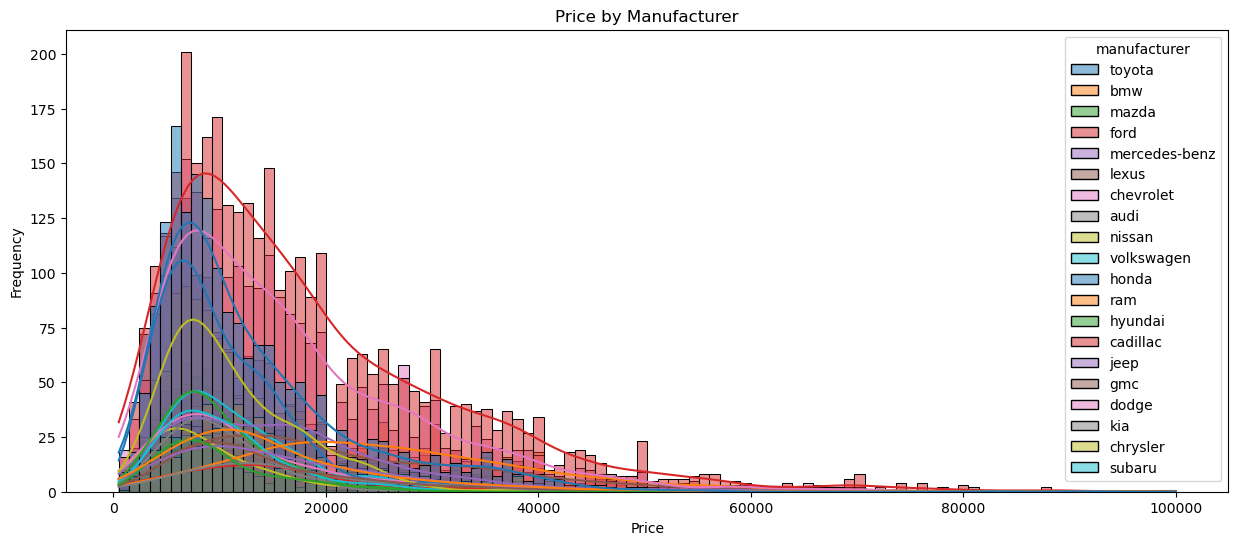

In [212]:
#Top 20 manufacturers
top_manufacturer_cnt = cleansed_cars_df['manufacturer'].value_counts().nlargest(20)
top_manufacturer_cnt = pd.DataFrame(top_manufacturer_cnt)
top_manufacturer_cnt

#Include the top 20 manufacturers
top_manufacturer = cleansed_cars_df[cleansed_cars_df['manufacturer'].isin(top_manufacturer_cnt.index)]


plt.figure(figsize=(15, 6))
sns.histplot(data=top_manufacturer , x='price', hue='manufacturer', kde=True, palette='tab10')
plt.title('Price by Manufacturer')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# The average price of a used car when calculated based on individual feature cylinders, fuel, year and odometer range around 15k which is near
# to the average price combined together with the 4 features